<function matplotlib.pyplot.show(close=None, block=None)>

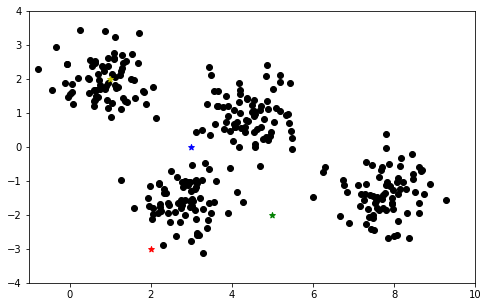

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#problem 1
df=pd.read_csv('D:/cdata.csv')#讀取資料
np.random.seed(1)#隨機選擇'initialized centroids'
k=4#設定題目所要求的k值
centroids={i+1:[np.random.randint(-2,6),np.random.randint(-3,3)]for i in range(k)}#在給定範圍中隨機挑選中心點
fig=plt.figure(figsize=(8,5))#設定圖表的長寬
plt.scatter(df['x'],df['y'],color='k')#以圖表顯示DataFrame中的'x''y'各點
colmap={1:'b',2:'r',3:'g',4:'y'}#設定中心點的顏色
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],marker='*',label='Central')#圖表上顯示中心點
plt.xlim(-1,10)#圖表中'x'軸得範圍
plt.ylim(-4,4)#圖表中'y'軸得範圍
plt.show#輸出圖表

<function matplotlib.pyplot.show(close=None, block=None)>

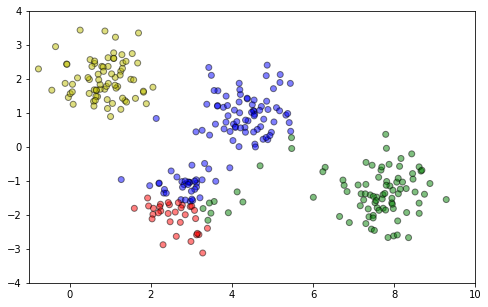

In [47]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt(((df['x']-centroids[i][0])**2)+(df['y']-centroids[i][1])**2))
        #(((x1-x2)^2))-((y1-y2)^2))#計算各點到各中心的距離
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]#將計算後的距離放入
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)#存放各點到距離最近的中心點的距離
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from_')))#對點進行分群
    df['color']=df['closest'].map(lambda x:colmap[x])#給予各分群的顏色
    return df
df=assignment(df,centroids)
#print(df.head())
fig=plt.figure(figsize=(8,5))#設定圖表的長寬
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')#以圖表顯示DataFrame中的'x''y'各點，並給予代表各群的顏色
plt.xlim(-1,10)#圖表中'x'軸得範圍
plt.ylim(-4,4)#圖表中'y'軸得範圍
plt.show#輸出圖表

{1: [3.8680472222222217, 0.31170925925925924], 2: [2.5930500000000003, -2.063475], 3: [7.286946511627906, -1.364981395348837], 4: [0.8505702702702704, 1.9980662162162162]}
{1: [3, 0], 2: [2, -3], 3: [5, -2], 4: [1, 2]}


<function matplotlib.pyplot.show(close=None, block=None)>

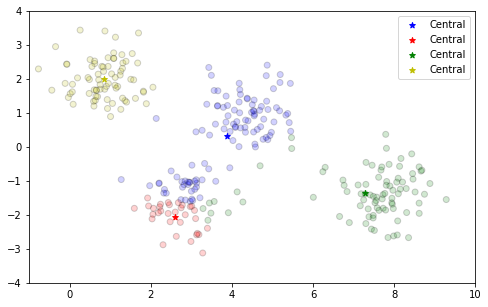

In [48]:
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])#找出新的中心點
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])#找出新的中心點
    return k
centroids=update(centroids)
print(centroids)#輸出新的中心點
print(old_centroids)#輸出舊的中心點
fig=plt.figure(figsize=(8,5))#設定圖表的長寬
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.18,edgecolor='k')#以圖表顯示DataFrame中的'x''y'各點
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],marker='*',label='Central')#圖表上顯示中心點
plt.xlim(-1,10)#圖表中'x'軸得範圍
plt.ylim(-4,4)#圖表中'y'軸得範圍
plt.legend()#顯示圖表右上方的'Central'
plt.show#輸出圖表

<function matplotlib.pyplot.show(close=None, block=None)>

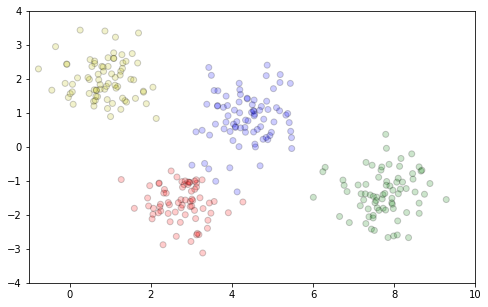

In [51]:
df=assignment(df,centroids)
#print(df.head())
fig=plt.figure(figsize=(8,5))#設定圖表的長寬
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.2,edgecolor='k')#以圖表顯示DataFrame中的'x''y'各點
plt.xlim(-1,10)#圖表中'x'軸得範圍
plt.ylim(-4,4)#圖表中'y'軸得範圍
plt.show#輸出圖表

<function matplotlib.pyplot.show(close=None, block=None)>

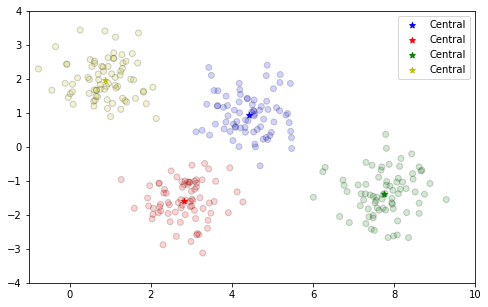

In [52]:
while True:#以下利用迴圈重複更新最佳中心點，若中心點不再變動，便停止迴圈
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
fig=plt.figure(figsize=(8,5))#設定圖表的長寬
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.18,edgecolor='k')#以圖表顯示DataFrame中的'x''y'各點
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],marker='*',label='Central')#圖表上顯示中心點
plt.xlim(-1,10)#圖表中'x'軸得範圍
plt.ylim(-4,4)#圖表中'y'軸得範圍
plt.legend()#顯示圖表右上方的'Central'
plt.show#輸出圖表

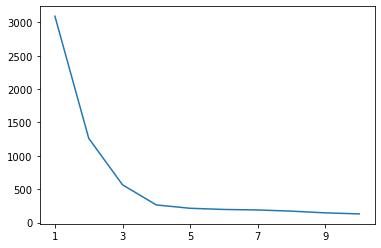

In [21]:
#problem 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df2=pd.read_csv('D:/cdata.csv')
df2=df2[['x','y']]#挑出所需資料
c1,c2,c3,c4,c5=[],[],[],[],[]#建立空白list，用來存放各點到各中心的位置
c6,c7,c8,c9,c10=[],[],[],[],[]#建立空白list，用來存放各點到各中心的位置
#c1(3,0)#c2(2,0),(6,0)#c3(1,2)(4,0)(8,-1)#c4(1,2)(3,-2)(4,1)(8,-2)#c5(1,2)(2,-2)(4,0)(5,1)(8,-1)
for i in range(len(df2[['x','y']])):#以下為計算不同k值之下，SSE的值
    x=((df2['x'][i]-3)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    c1.append(x)#將距離的值放入list
SSE1=sum(c1)#前300最小值加總
for i in range(len(df2[['x','y']])):#k=2
    x=((df2['x'][i]-2)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    y=((df2['x'][i]-6)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    c2.append(x)#將距離的值放入list
    c2.append(y)#將距離的值放入list
c2.sort()#由大到小排序
SSE2=sum(c2[0:299])#前300最小值加總
for i in range(len(df2[['x','y']])):#k=3
    x=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    z=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    c3.append(x)#將距離的值放入list
    c3.append(y)#將距離的值放入list
    c3.append(z)#將距離的值放入list
c3.sort()#由大到小排序
SSE3=sum(c3[0:299])#前300最小值加總
for i in range(len(df2[['x','y']])):#k=4
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-3)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    c4.append(x1)#將距離的值放入list
    c4.append(y1)#將距離的值放入list
    c4.append(z1)#將距離的值放入list
    c4.append(x2)#將距離的值放入list
c4.sort()#由大到小排序
SSE4=sum(c4[0:299])#前300最小值加總
for i in range(len(df2[['x','y']])):#k=5
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df2['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    c5.append(x1)#將距離的值放入list
    c5.append(y1)#將距離的值放入list
    c5.append(z1)#將距離的值放入list
    c5.append(x2)#將距離的值放入list
    c5.append(y2)#將距離的值放入list
c5.sort()#由大到小排序
SSE5=sum(c5[0:299])#前300最小值加總
#c6(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)
for i in range(len(df2[['x','y']])):#k=6
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df2['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df2['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    c6.append(x1)#將距離的值放入list
    c6.append(y1)#將距離的值放入list
    c6.append(z1)#將距離的值放入list
    c6.append(x2)#將距離的值放入list
    c6.append(y2)#將距離的值放入list
    c6.append(z2)#將距離的值放入list
c6.sort()#由大到小排序
SSE6=sum(c6[0:299])#前300最小值加總
#c7(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)(6,-1)
for i in range(len(df2[['x','y']])):#k=7
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df2['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df2['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x3=((df2['x'][i]-6)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    c7.append(x1)#將距離的值放入list
    c7.append(y1)#將距離的值放入list
    c7.append(z1)#將距離的值放入list
    c7.append(x2)#將距離的值放入list
    c7.append(y2)#將距離的值放入list
    c7.append(z2)#將距離的值放入list
    c7.append(x3)#將距離的值放入list
c7.sort()#由大到小排序
SSE7=sum(c7[0:299])#前300最小值加總
#c8(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)(6,-1)(9,-1)
for i in range(len(df2[['x','y']])):#k=8
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df2['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df2['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x3=((df2['x'][i]-6)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    y3=((df2['x'][i]-9)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    c8.append(x1)#將距離的值放入list
    c8.append(y1)#將距離的值放入list
    c8.append(z1)#將距離的值放入list
    c8.append(x2)#將距離的值放入list
    c8.append(y2)#將距離的值放入list
    c8.append(z2)#將距離的值放入list
    c8.append(x3)#將距離的值放入list
    c8.append(y3)#將距離的值放入list
c8.sort()#由大到小排序
SSE8=sum(c8[0:299])#前300最小值加總
#c9(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)(6,-1)(9,-1)(0,2)
for i in range(len(df2[['x','y']])):#k=9
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df2['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df2['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x3=((df2['x'][i]-6)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    y3=((df2['x'][i]-9)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z3=((df2['x'][i]-0)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    c9.append(x1)#將距離的值放入list
    c9.append(y1)#將距離的值放入list
    c9.append(z1)#將距離的值放入list
    c9.append(x2)#將距離的值放入list
    c9.append(y2)#將距離的值放入list
    c9.append(z2)#將距離的值放入list
    c9.append(x3)#將距離的值放入list
    c9.append(y3)#將距離的值放入list
    c9.append(z3)#將距離的值放入list
c9.sort()#由大到小排序
SSE9=sum(c9[0:299])#前300最小值加總
#c10(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)(6,-1)(9,-1)(0,2)(1,1)
for i in range(len(df2[['x','y']])):#k=10
    x1=((df2['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df2['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df2['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df2['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df2['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df2['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x3=((df2['x'][i]-6)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    y3=((df2['x'][i]-9)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z3=((df2['x'][i]-0)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    x4=((df2['x'][i]-1)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    c10.append(x1)#將距離的值放入list
    c10.append(y1)#將距離的值放入list
    c10.append(z1)#將距離的值放入list
    c10.append(x2)#將距離的值放入list
    c10.append(y2)#將距離的值放入list
    c10.append(z2)#將距離的值放入list
    c10.append(x3)#將距離的值放入list
    c10.append(y3)#將距離的值放入list
    c10.append(z3)#將距離的值放入list
    c10.append(x4)#將距離的值放入list
c10.sort()#由大到小排序
SSE10=sum(c10[0:299])#前300最小值加總
k=['1','2','3','4','5','6','7','8','9','10']#建立index
SSE=[SSE1,SSE2,SSE3,SSE4,SSE5,SSE6,SSE7,SSE8,SSE9,SSE10]#將不同k值下的SSE放入list中
ans=pd.Series(SSE,index=k)#將資料組成Series
ans.plot()#資料轉圖表
plt.show()#輸出圖表

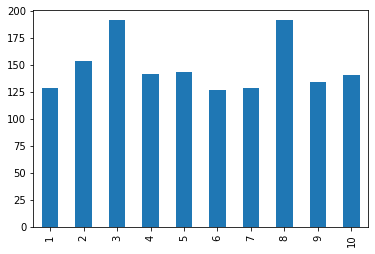

In [22]:
#problem 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df3=pd.read_csv('D:/cdata.csv')
df3=df3[['x','y']]#挑出所需資料
c10_1,c10_2,c10_3,c10_4,c10_5=[],[],[],[],[]#建立空白list，用來存放各點到各中心的位置
c10_6,c10_7,c10_8,c10_9,c10_10=[],[],[],[],[]#建立空白list，用來存放各點到各中心的位置
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_1(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)(6,-1)(9,-1)(0,2)(1,1)
for i in range(len(df3[['x','y']])):#隨機點(1)#以下為計算k=10時，中心點隨機變化之下的SSE的值
    x1=((df3['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    c10_1.append(x1)#將距離的值放入list
    c10_1.append(y1)#將距離的值放入list
    c10_1.append(z1)#將距離的值放入list
    c10_1.append(x2)#將距離的值放入list
    c10_1.append(y2)#將距離的值放入list
    c10_1.append(z2)#將距離的值放入list
    c10_1.append(x3)#將距離的值放入list
    c10_1.append(y3)#將距離的值放入list
    c10_1.append(z3)#將距離的值放入list
    c10_1.append(x4)#將距離的值放入list
c10_1.sort()#由大到小排序
SSE10_1=sum(c10_1[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_2(1.5,2.5)(2.5,-2.5)(4.5,0.5)(5.5,1.5)(8.5,-1.5)(2.5,1.5)(6.5,-1.5)(9.5,-1.5)(0.5,2.5)(1.5,1.5)
for i in range(len(df3[['x','y']])):#隨機點(2)
    x1=((df3['x'][i]-1.5)**2)+((df2['y'][i]-2.5)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2.5)**2)+((df2['y'][i]-(-2.5))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4.5)**2)+((df2['y'][i]-0.5)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5.5)**2)+((df2['y'][i]-1.5)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8.5)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2.5)**2)+((df2['y'][i]-1.5)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6.5)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9.5)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.5)**2)+((df2['y'][i]-2.5)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.5)**2)+((df2['y'][i]-1.5)**2)#計算點到中心的距離
    c10_2.append(x1)#將距離的值放入list
    c10_2.append(y1)#將距離的值放入list
    c10_2.append(z1)#將距離的值放入list
    c10_2.append(x2)#將距離的值放入list
    c10_2.append(y2)#將距離的值放入list
    c10_2.append(z2)#將距離的值放入list
    c10_2.append(x3)#將距離的值放入list
    c10_2.append(y3)#將距離的值放入list
    c10_2.append(z3)#將距離的值放入list
    c10_2.append(x4)#將距離的值放入list
c10_2.sort()#由大到小排序
SSE10_2=sum(c10_2[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_3(1.8,2.8)(2.7,-2.3)(4.8,0.8)(5.7,1.7)(8.6,-1.6)(2.6,1.3)(6.7,-1.2)(9.8,-1.1)(0.7,2.9)(1.8,1.2)
for i in range(len(df3[['x','y']])):#隨機點(3)
    x1=((df3['x'][i]-1.8)**2)+((df2['y'][i]-2.8)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2.7)**2)+((df2['y'][i]-(-2.3))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4.8)**2)+((df2['y'][i]-0.8)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5.7)**2)+((df2['y'][i]-1.7)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8.6)**2)+((df2['y'][i]-(-1.6))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2.6)**2)+((df2['y'][i]-1.3)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6.7)**2)+((df2['y'][i]-(-1.2))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9.8)**2)+((df2['y'][i]-(-1.1))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.7)**2)+((df2['y'][i]-2.9)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.8)**2)+((df2['y'][i]-1.2)**2)#計算點到中心的距離
    c10_3.append(x1)#將距離的值放入list
    c10_3.append(y1)#將距離的值放入list
    c10_3.append(z1)#將距離的值放入list
    c10_3.append(x2)#將距離的值放入list
    c10_3.append(y2)#將距離的值放入list
    c10_3.append(z2)#將距離的值放入list
    c10_3.append(x3)#將距離的值放入list
    c10_3.append(y3)#將距離的值放入list
    c10_3.append(z3)#將距離的值放入list
    c10_3.append(x4)#將距離的值放入list
c10_3.sort()#由大到小排序
SSE10_3=sum(c10_3[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_4(1.1,2.5)(2.8,-2.1)(4.7,0.9)(5.2,1.75)(8.8,-1.23)(2.56,1.6)(6.3,-1.2)(9.2,-1.5)(0.8,2.5)(1.5,1)
for i in range(len(df3[['x','y']])):#隨機點(4)
    x1=((df3['x'][i]-1.1)**2)+((df2['y'][i]-2.5)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2.8)**2)+((df2['y'][i]-(-2.1))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4.7)**2)+((df2['y'][i]-0.9)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5.2)**2)+((df2['y'][i]-1.75)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8.8)**2)+((df2['y'][i]-(-1.23))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2.56)**2)+((df2['y'][i]-1.6)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6.3)**2)+((df2['y'][i]-(-1.2))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9.2)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.8)**2)+((df2['y'][i]-2.5)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    c10_4.append(x1)#將距離的值放入list
    c10_4.append(y1)#將距離的值放入list
    c10_4.append(z1)#將距離的值放入list
    c10_4.append(x2)#將距離的值放入list
    c10_4.append(y2)#將距離的值放入list
    c10_4.append(z2)#將距離的值放入list
    c10_4.append(x3)#將距離的值放入list
    c10_4.append(y3)#將距離的值放入list
    c10_4.append(z3)#將距離的值放入list
    c10_4.append(x4)#將距離的值放入list
c10_4.sort()#由大到小排序
SSE10_4=sum(c10_4[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_5(0.7,2.1)(1.8,-2.25)(3.75,0.23)(4.75,1.15)(7.77,-1.05)(1.95,1.05)(5.96,-1.67)(8.85,-1.2)(0.23,2.25)(1.05,1.22)
for i in range(len(df3[['x','y']])):#隨機點(5)
    x1=((df3['x'][i]-0.7)**2)+((df2['y'][i]-2.1)**2)#計算點到中心的距離
    y1=((df3['x'][i]-1.8)**2)+((df2['y'][i]-(-2.25))**2)#計算點到中心的距離
    z1=((df3['x'][i]-3.75)**2)+((df2['y'][i]-0.23)**2)#計算點到中心的距離
    x2=((df3['x'][i]-4.75)**2)+((df2['y'][i]-1.15)**2)#計算點到中心的距離
    y2=((df3['x'][i]-7.77)**2)+((df2['y'][i]-(-1.05))**2)#計算點到中心的距離
    z2=((df3['x'][i]-1.95)**2)+((df2['y'][i]-1.05)**2)#計算點到中心的距離
    x3=((df3['x'][i]-5.96)**2)+((df2['y'][i]-(-1.67))**2)#計算點到中心的距離
    y3=((df3['x'][i]-8.85)**2)+((df2['y'][i]-(-1.2))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.23)**2)+((df2['y'][i]-2.25)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.05)**2)+((df2['y'][i]-1.22)**2)#計算點到中心的距離
    c10_5.append(x1)#將距離的值放入list
    c10_5.append(y1)#將距離的值放入list
    c10_5.append(z1)#將距離的值放入list
    c10_5.append(x2)#將距離的值放入list
    c10_5.append(y2)#將距離的值放入list
    c10_5.append(z2)#將距離的值放入list
    c10_5.append(x3)#將距離的值放入list
    c10_5.append(y3)#將距離的值放入list
    c10_5.append(z3)#將距離的值放入list
    c10_1.append(x4)#將距離的值放入list
c10_5.sort()#由大到小排序
SSE10_5=sum(c10_5[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_6(1.1,2.1)(2.1,-2.1)(4.1,0.1)(5.1,1.1)(8.1,-1.1)(2.1,1.1)(6.1,-1.1)(9.1,-1.1)(0.1,2.1)(1.1,1.1)
for i in range(len(df3[['x','y']])):#隨機點(6)
    x1=((df3['x'][i]-1.1)**2)+((df2['y'][i]-2.1)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2.1)**2)+((df2['y'][i]-(-2.1))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4.1)**2)+((df2['y'][i]-0.1)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5.1)**2)+((df2['y'][i]-1.1)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8.1)**2)+((df2['y'][i]-(-1.1))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2.1)**2)+((df2['y'][i]-1.1)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6.1)**2)+((df2['y'][i]-(-1.1))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9.1)**2)+((df2['y'][i]-(-1.1))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.1)**2)+((df2['y'][i]-2.1)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.1)**2)+((df2['y'][i]-1.1)**2)#計算點到中心的距離
    c10_6.append(x1)#將距離的值放入list
    c10_6.append(y1)#將距離的值放入list
    c10_6.append(z1)#將距離的值放入list
    c10_6.append(x2)#將距離的值放入list
    c10_6.append(y2)#將距離的值放入list
    c10_6.append(z2)#將距離的值放入list
    c10_6.append(x3)#將距離的值放入list
    c10_6.append(y3)#將距離的值放入list
    c10_6.append(z3)#將距離的值放入list
    c10_6.append(x4)#將距離的值放入list
c10_6.sort()#由大到小排序
SSE10_6=sum(c10_6[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_7(1,2)(2,-2)(4,0)(5,1)(8,-1)(2,1)(6,-1)(9,-1)(0,2)(1,1)
for i in range(len(df3[['x','y']])):#隨機點(7)
    x1=((df3['x'][i]-1)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2)**2)+((df2['y'][i]-(-2))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4)**2)+((df2['y'][i]-0)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9)**2)+((df2['y'][i]-(-1))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0)**2)+((df2['y'][i]-2)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1)**2)+((df2['y'][i]-1)**2)#計算點到中心的距離
    c10_7.append(x1)#將距離的值放入list
    c10_7.append(y1)#將距離的值放入list
    c10_7.append(z1)#將距離的值放入list
    c10_7.append(x2)#將距離的值放入list
    c10_7.append(y2)#將距離的值放入list
    c10_7.append(z2)#將距離的值放入list
    c10_7.append(x3)#將距離的值放入list
    c10_7.append(y3)#將距離的值放入list
    c10_7.append(z3)#將距離的值放入list
    c10_7.append(x4)#將距離的值放入list
c10_7.sort()#由大到小排序
SSE10_7=sum(c10_7[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_8(0.5,1.5)(1.5,-1.5)(3.5,-0.5)(4.5,0.5)(7.5,-0.5)(1.5,0.5)(5.5,-1.5)(8.5,-1.5)(-0.5,1.5)(0.5,0.5)
for i in range(len(df3[['x','y']])):#隨機點(8)
    x1=((df3['x'][i]-0.5)**2)+((df2['y'][i]-1.5)**2)#計算點到中心的距離
    y1=((df3['x'][i]-1.5)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    z1=((df3['x'][i]-3.5)**2)+((df2['y'][i]-(-0.5))**2)#計算點到中心的距離
    x2=((df3['x'][i]-4.5)**2)+((df2['y'][i]-0.5)**2)#計算點到中心的距離
    y2=((df3['x'][i]-7.5)**2)+((df2['y'][i]-(-0.5))**2)#計算點到中心的距離
    z2=((df3['x'][i]-1.5)**2)+((df2['y'][i]-0.5)**2)#計算點到中心的距離
    x3=((df3['x'][i]-5.5)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    y3=((df3['x'][i]-8.5)**2)+((df2['y'][i]-(-1.5))**2)#計算點到中心的距離
    z3=((df3['x'][i]-(-0.5))**2)+((df2['y'][i]-1.5)**2)#計算點到中心的距離
    x4=((df3['x'][i]-0.5)**2)+((df2['y'][i]-0.5)**2)#計算點到中心的距離
    c10_8.append(x1)#將距離的值放入list
    c10_8.append(y1)#將距離的值放入list
    c10_8.append(z1)#將距離的值放入list
    c10_8.append(x2)#將距離的值放入list
    c10_8.append(y2)#將距離的值放入list
    c10_8.append(z2)#將距離的值放入list
    c10_1.append(x3)#將距離的值放入list
    c10_8.append(y3)#將距離的值放入list
    c10_8.append(z3)#將距離的值放入list
    c10_8.append(x4)#將距離的值放入list
c10_8.sort()#由大到小排序
SSE10_8=sum(c10_8[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_9(1.3,2.3)(2.3,-2.3)(4.3,0.3)(5.3,1.3)(8.3,-1.3)(2.3,1.3)(6.3,-1.3)(9.3,-1.3)(0.3,2.3)(1.3,1.3)
for i in range(len(df3[['x','y']])):#隨機點(9)
    x1=((df3['x'][i]-1.3)**2)+((df2['y'][i]-2.3)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2.3)**2)+((df2['y'][i]-(-2.3))**2)#計算點到中心的距離
    z1=((df3['x'][i]-4.3)**2)+((df2['y'][i]-0.3)**2)#計算點到中心的距離
    x2=((df3['x'][i]-5.3)**2)+((df2['y'][i]-1.3)**2)#計算點到中心的距離
    y2=((df3['x'][i]-8.3)**2)+((df2['y'][i]-(-1.3))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2.3)**2)+((df2['y'][i]-1.3)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6.3)**2)+((df2['y'][i]-(-1.3))**2)#計算點到中心的距離
    y3=((df3['x'][i]-9.3)**2)+((df2['y'][i]-(-1.3))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.3)**2)+((df2['y'][i]-2.3)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.3)**2)+((df2['y'][i]-1.3)**2)#計算點到中心的距離
    c10_9.append(x1)#將距離的值放入list
    c10_9.append(y1)#將距離的值放入list
    c10_9.append(z1)#將距離的值放入list
    c10_9.append(x2)#將距離的值放入list
    c10_9.append(y2)#將距離的值放入list
    c10_9.append(z2)#將距離的值放入list
    c10_9.append(x3)#將距離的值放入list
    c10_9.append(y3)#將距離的值放入list
    c10_9.append(z3)#將距離的值放入list
    c10_9.append(x4)#將距離的值放入list
c10_9.sort()#由大到小排序
SSE10_9=sum(c10_9[0:299])#前300最小值加總
#k=10#xlim(-1,10)ylim(-4,4)#k的數量與'x,y'的範圍。
#c10_10(0.4,2.6)(2.6,-1.4)(3.4,0.6)(4.4,1.6)(7.4,-0.4)(2.6,0.4)(6.6,-1.6)(8.4,-0.4)(0.6,1.4)(1.2,0.92)
for i in range(len(df3[['x','y']])):#隨機點(10)
    x1=((df3['x'][i]-0.4)**2)+((df2['y'][i]-2.6)**2)#計算點到中心的距離
    y1=((df3['x'][i]-2.6)**2)+((df2['y'][i]-(-1.4))**2)#計算點到中心的距離
    z1=((df3['x'][i]-3.4)**2)+((df2['y'][i]-0.6)**2)#計算點到中心的距離
    x2=((df3['x'][i]-4.4)**2)+((df2['y'][i]-1.6)**2)#計算點到中心的距離
    y2=((df3['x'][i]-7.4)**2)+((df2['y'][i]-(-0.4))**2)#計算點到中心的距離
    z2=((df3['x'][i]-2.6)**2)+((df2['y'][i]-0.4)**2)#計算點到中心的距離
    x3=((df3['x'][i]-6.6)**2)+((df2['y'][i]-(-1.6))**2)#計算點到中心的距離
    y3=((df3['x'][i]-8.4)**2)+((df2['y'][i]-(-0.4))**2)#計算點到中心的距離
    z3=((df3['x'][i]-0.6)**2)+((df2['y'][i]-1.4)**2)#計算點到中心的距離
    x4=((df3['x'][i]-1.2)**2)+((df2['y'][i]-0.92)**2)#計算點到中心的距離
    c10_10.append(x1)#將距離的值放入list
    c10_10.append(y1)#將距離的值放入list
    c10_10.append(z1)#將距離的值放入list
    c10_10.append(x2)#將距離的值放入list
    c10_10.append(y2)#將距離的值放入list
    c10_10.append(z2)#將距離的值放入list
    c10_10.append(x3)#將距離的值放入list
    c10_10.append(y3)#將距離的值放入list
    c10_10.append(z3)#將距離的值放入list
    c10_10.append(x4)#將距離的值放入list
c10_10.sort()#由大到小排序
SSE10_10=sum(c10_10[0:299])#前300最小值加總
order=['1','2','3','4','5','6','7','8','9','10']#建立index
SSE=[SSE10_1,SSE10_2,SSE10_3,SSE10_4,SSE10_5,SSE10_6,SSE10_7,SSE10_8,SSE10_9,SSE10_10]#將不同k值下的SSE放入list中
ans1=pd.Series(SSE,index=order)#建立Series
ans1.plot(kind='bar')#長條圖
plt.show()#輸出圖表